# **ES 114 Probability Lab Assignment - 3**

Name- Shardul Junagade

Roll no- 23110297

# **PMF of Discrete Random Variables**

In the first part of the notebook, I used `Matplotlib` to visualize the Probability Mass Function (PMF) of the following Discrete Random Variables:
 - **Discrete Uniform Random Variables**: Each outcome in a finite set of equally likely outcomes.
 - **Bernoulli Random Variables**: A random variable with exactly two possible outcomes, "success" and "failure".
 - **Binomial Random Variables**: The number of successes in a fixed number of independent Bernoulli trials.
 - **Poisson Random Variables**: The number of events occurring in a fixed interval of time or space, with a known constant mean rate and independently of the time since the last event.
 - **Geometric Random Variables**: The number of trials needed to get the first success in a series of independent Bernoulli trials.

In the second part, I verified the equivalence of the Binomial Distribution and Poisson Distribution for large values of `M` (number of trials) and small values of `p` (probability of success).

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Helper Functions

In [2]:
def factorial(n):
  fac=1
  for i in range(1,n+1):
    fac*=i
  return fac

def combination(n,r):
  return factorial(n)/(factorial(r)*factorial(n-r))

## Probability Mass Functions (PMFs) for different Random Variables

### Discrete Uniform Random Variable

This type of PMF is obtained when all the **distinct** random variables have the same probability or are equiprobable. The PMF is defined as:

$$P_x(k) = \frac{1}{n}$$

where $n$ is the number of distinct random variables. 

This distribution is often used in scenarios where each outcome is equally likely, such as rolling a fair die or drawing a card from a well-shuffled deck.

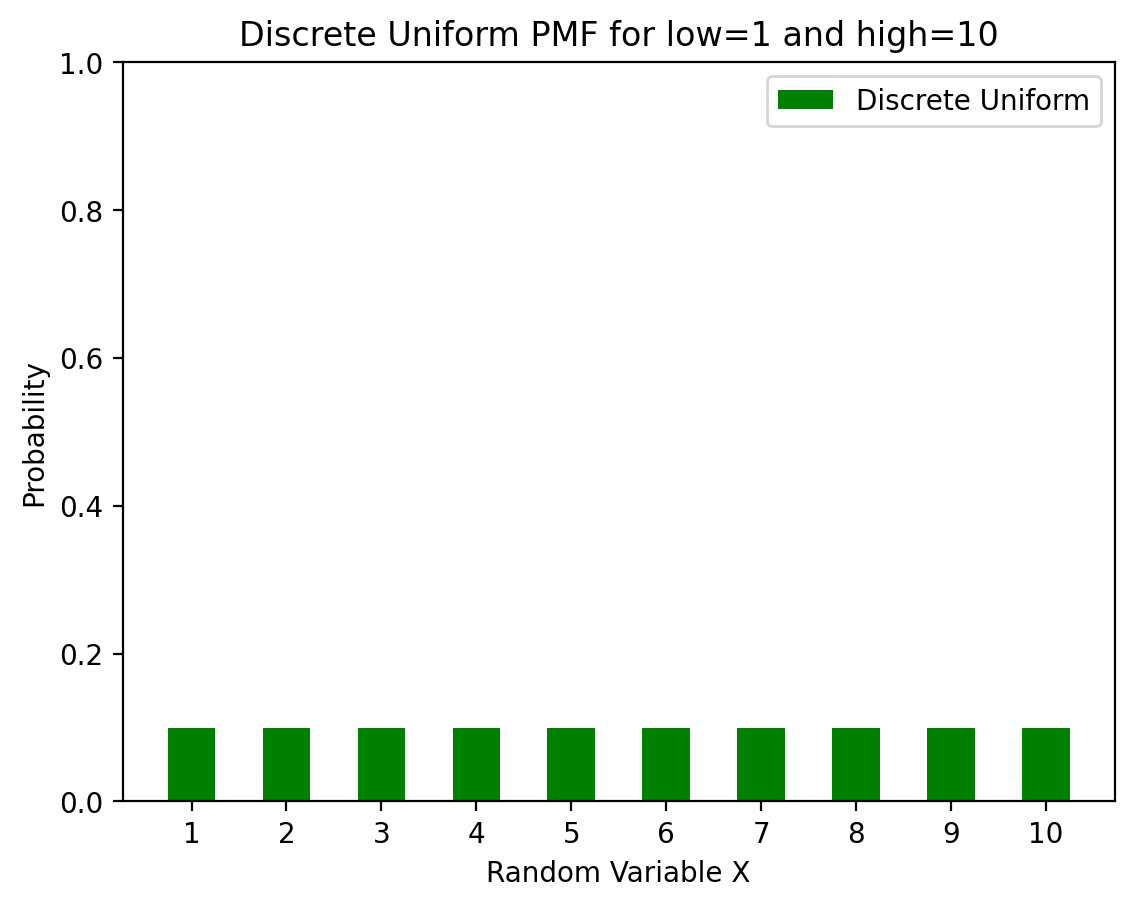

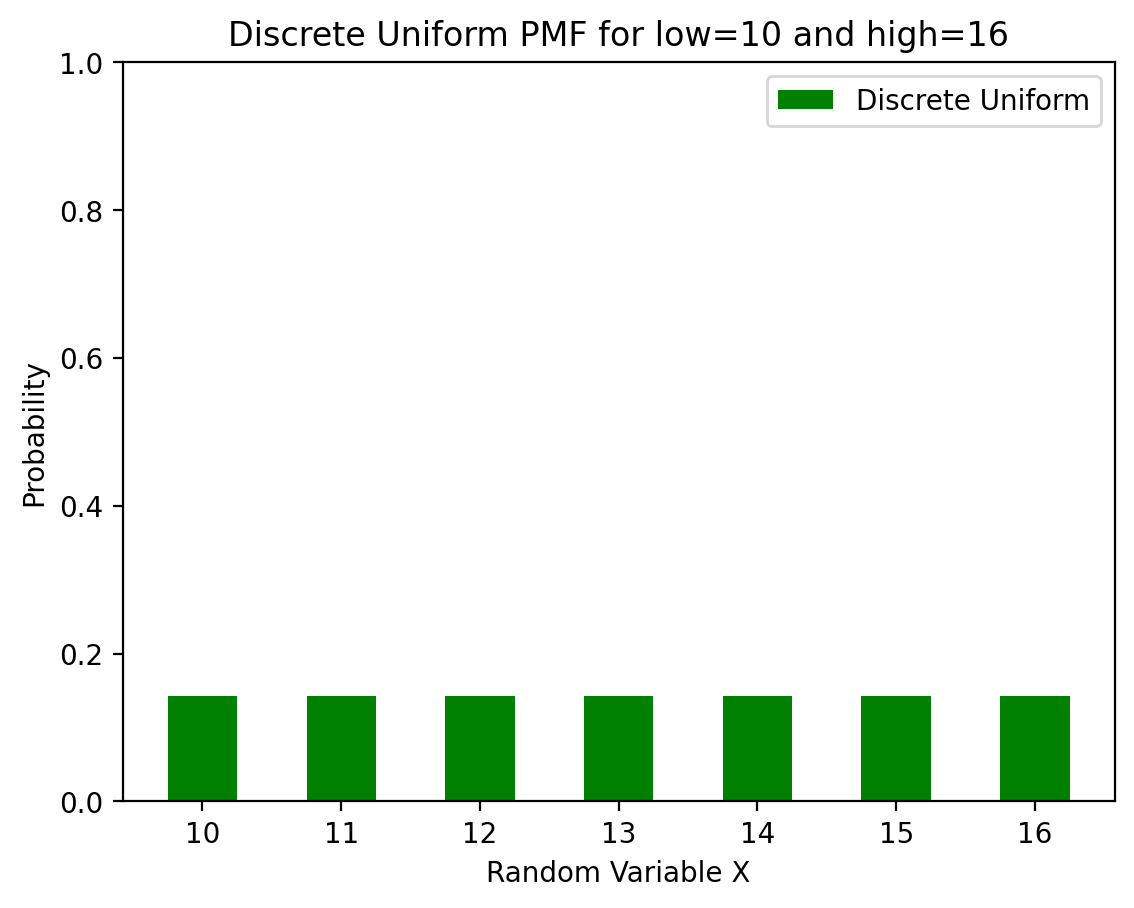

In [3]:
#Q1 a) Discrete Uniform Probability Distribution
def probability_discrete(num):
  return 1/(num)

def discrete_pmf(low, high, plot_pmf=True):
  x=np.arange(low, high+1)
  num=high+1-low
  pmf=[probability_discrete(num) for i in x]
  if plot_pmf:
    plt.bar(x, pmf, width=0.5, color="g", alpha=1, label="Discrete Uniform")
    plt.title(f"Discrete Uniform PMF for low={low} and high={high}")
    plt.xlabel("Random Variable X")
    plt.ylabel("Probability")
    plt.xticks(x)
    plt.ylim(0,1)
    plt.legend()
    plt.show()
  return pmf

# Example Plots
x1 = discrete_pmf(1,10)
x2 = discrete_pmf(10,16)

### Bernoulli Random Variable

Bernoulli random variable is used when we have only two random variables, and one of them has a probability of $p$ of occurring and another has a probability of $1-p$ of occurring. The probability mass function of a Bernoulli random variable is:

$$P_x(k) = 
\begin{cases} 
p & \text{if } k = 1 \\
1 - p & \text{if } k = 0 
\end{cases}$$

This distribution is often used to model scenarios with two possible outcomes, such as success/failure, yes/no, or true/false.

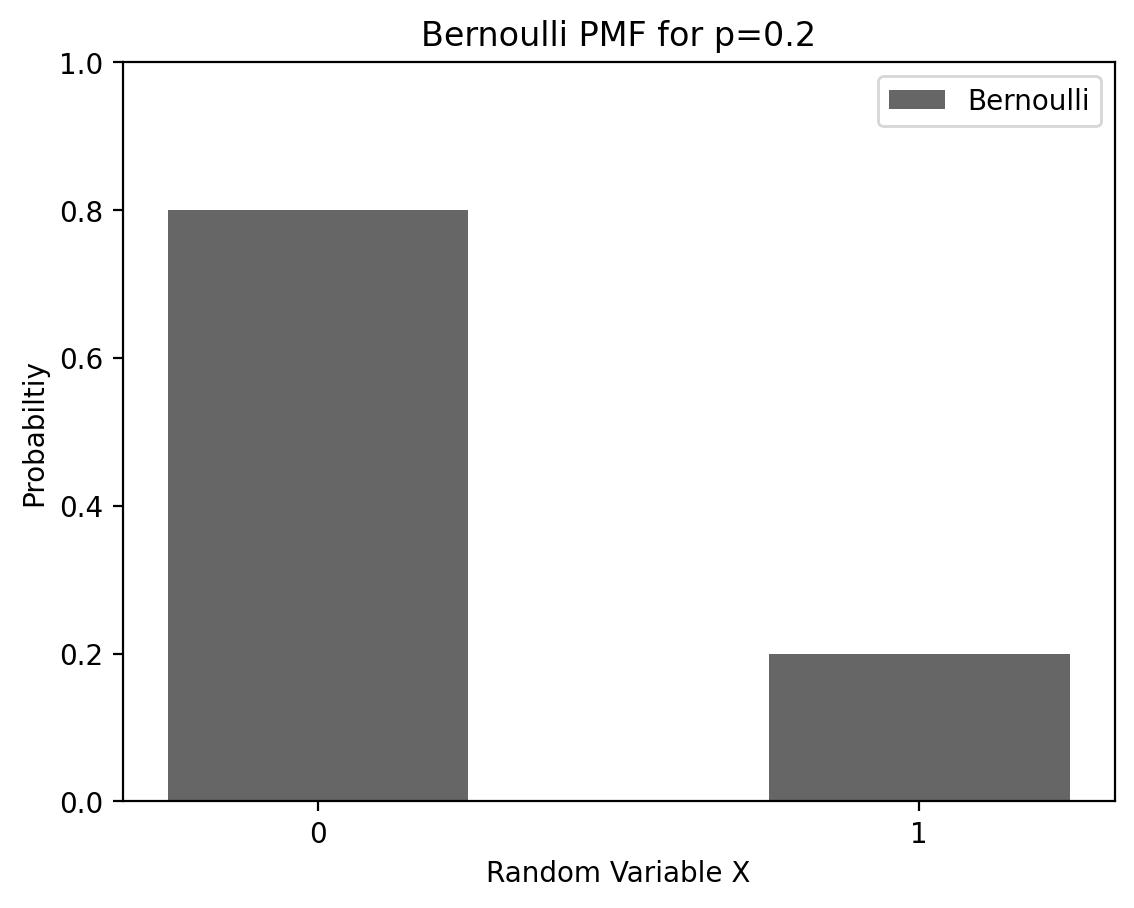

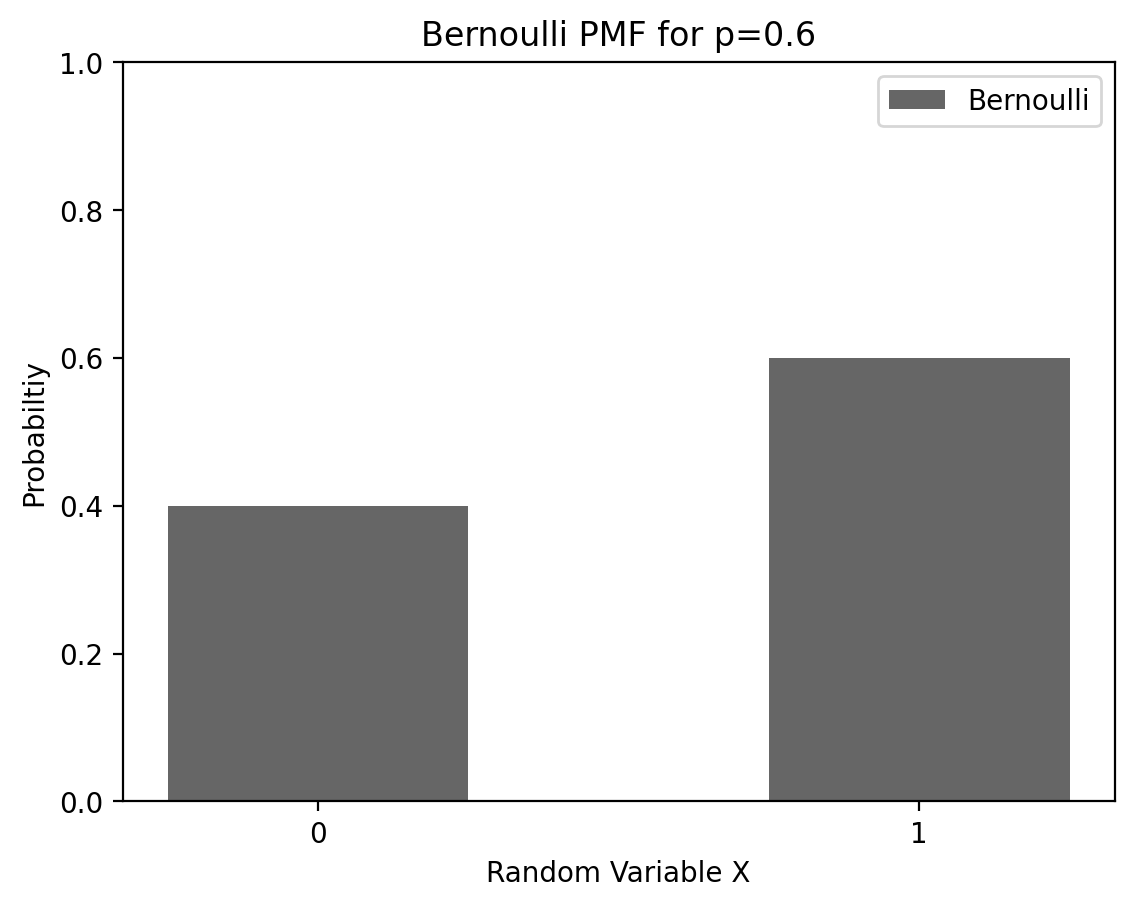

In [4]:
#Q1 b) Bernoulli PMF
def probability_bernoulli(x,p):
  if x==0:
    return 1-p
  elif x==1:
    return p
  else:
    return

def bernoulli_pmf(p, plot_pmf=True):
  x=[0,1]
  pmf=[probability_bernoulli(i,p) for i in x]
  if plot_pmf:
    plt.bar(x, pmf, width=0.5, color="black", alpha=0.6, label="Bernoulli")
    plt.title(f"Bernoulli PMF for p={p}")
    plt.xlabel("Random Variable X")
    plt.xticks(x)
    plt.ylim(0,1)
    plt.ylabel("Probabiltiy")
    plt.legend()
    plt.show()
  return pmf

# Example Plots
x1 = bernoulli_pmf(0.2)
x2 = bernoulli_pmf(0.6)

### Binomial Random Variable

Binomial random variable is used when we have a fixed number of independent trials, each with the same probability of success. The probability mass function of a Binomial random variable is:

$$P_x(k) = \binom{M}{k} p^k (1-p)^{M-k}$$

where:
- $M$ is the number of trials,
- $k$ is the number of successes,
- $p$ is the probability of success on each trial.

This distribution is often used to model scenarios where we are interested in the number of successes in a fixed number of trials, such as the number of heads in a series of coin flips.

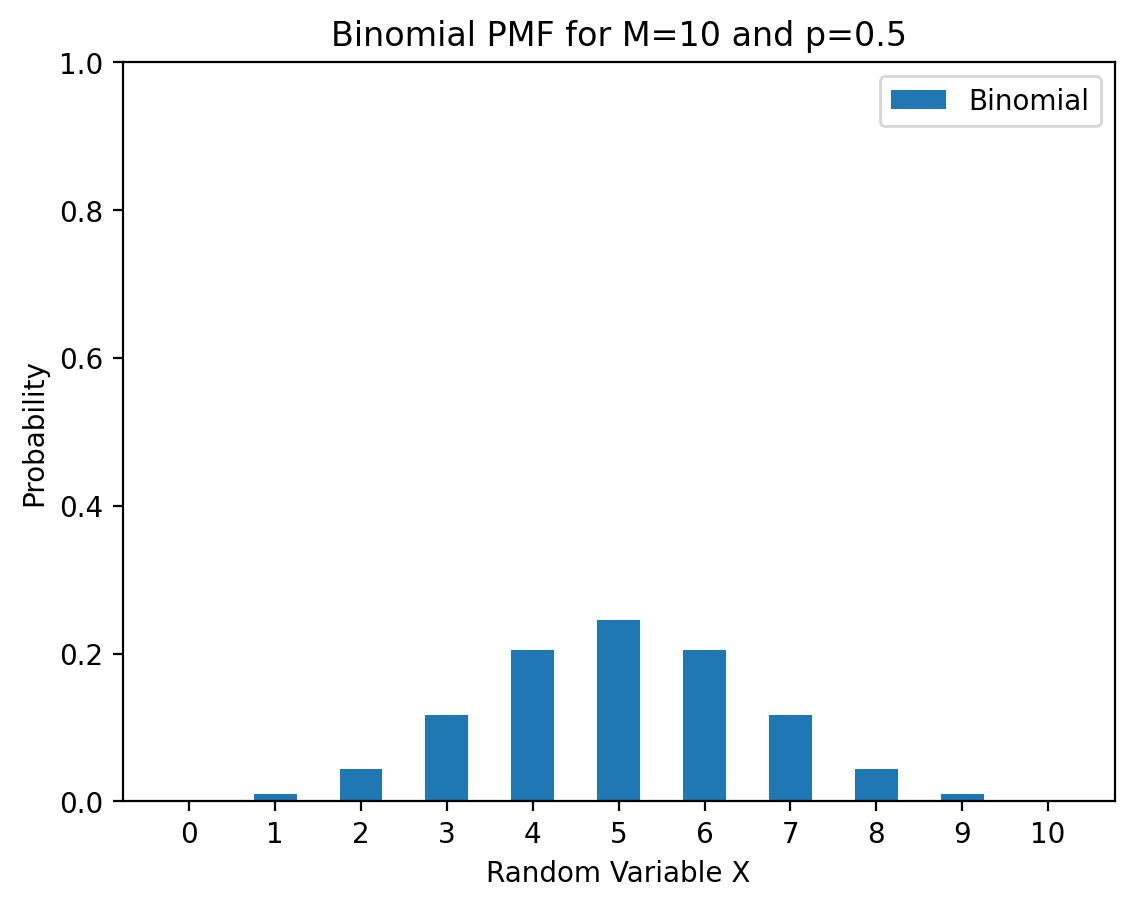

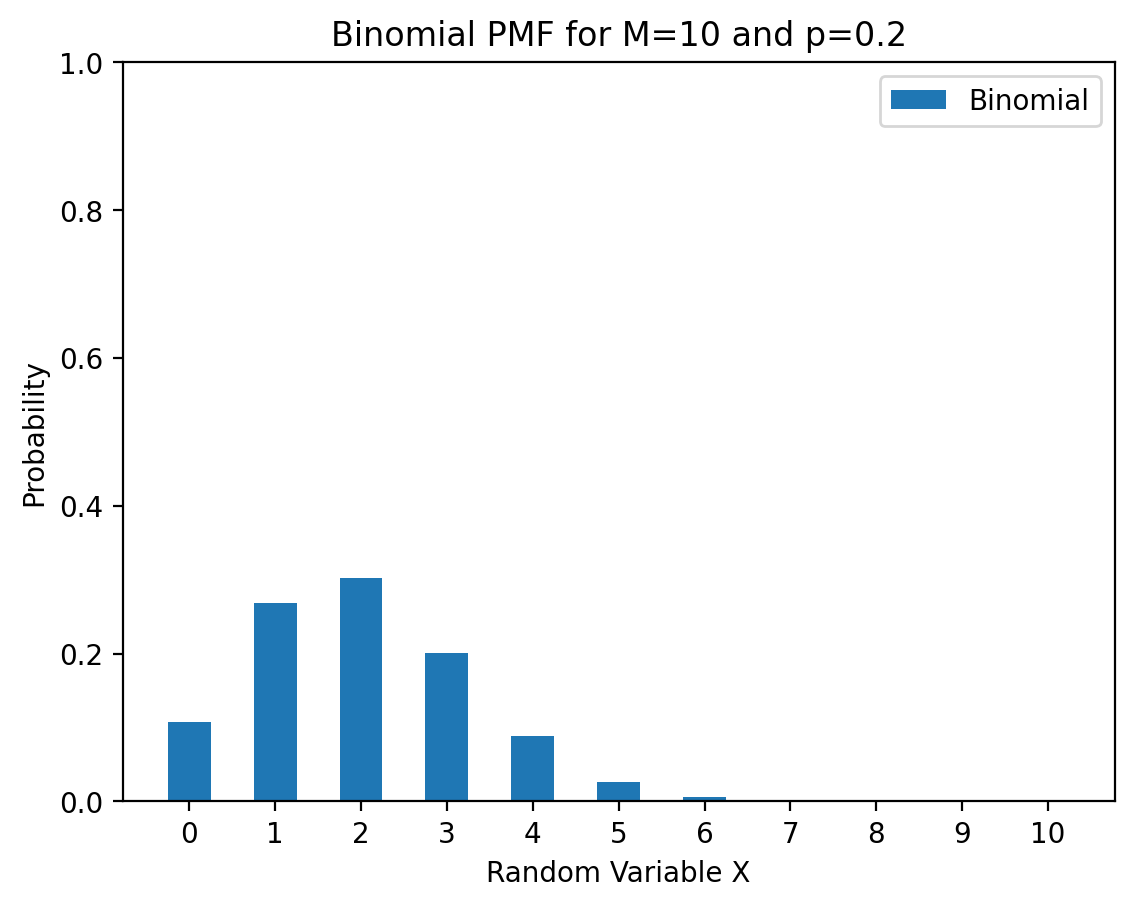

In [5]:
#Q1 c) Binomial PMF
def binomial_probability(k,M,p):
  return combination(M,k) * (p**k) * ((1-p)**(M-k))

def binomial_pmf(M, p, plot_pmf=True):
  x = np.arange(M + 1)
  pmf = [binomial_probability(i, M, p) for i in x]
  if plot_pmf:
    plt.bar(x, pmf, width=0.5, alpha=1, label="Binomial")
    plt.title(f"Binomial PMF for M={M} and p={p}")
    plt.xlabel("Random Variable X")
    plt.xticks(x)
    plt.ylim(0, 1)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()
  return pmf

# Example Plots
x1 = binomial_pmf(10, 0.5)
x2 = binomial_pmf(10, 0.2)

### Poisson Random Variable

Poisson random variable is used to model the number of events occurring in a fixed interval of time or space, with a known constant mean rate and independently of the time since the last event. The probability mass function of a Poisson random variable is:

$$P_x(k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

where:
- $\lambda$ is the average number of events in the interval,
- $k$ is the number of events.

This distribution is often used to model scenarios such as the number of emails received in an hour or the number of decay events per unit time from a radioactive source.

#### (i) By taking $M$ and $p$ as parameters 
where $\lambda$ is defined as: $$\lambda = p\cdot M$$

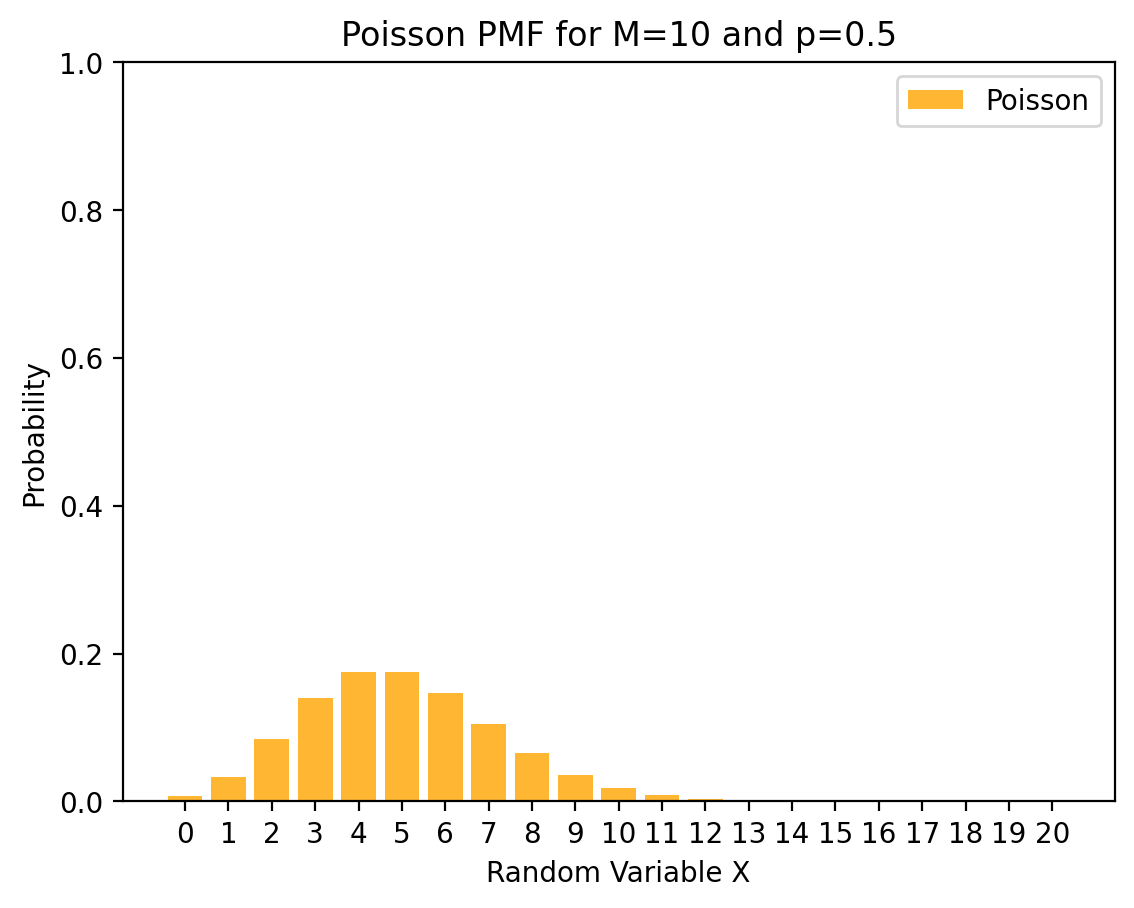

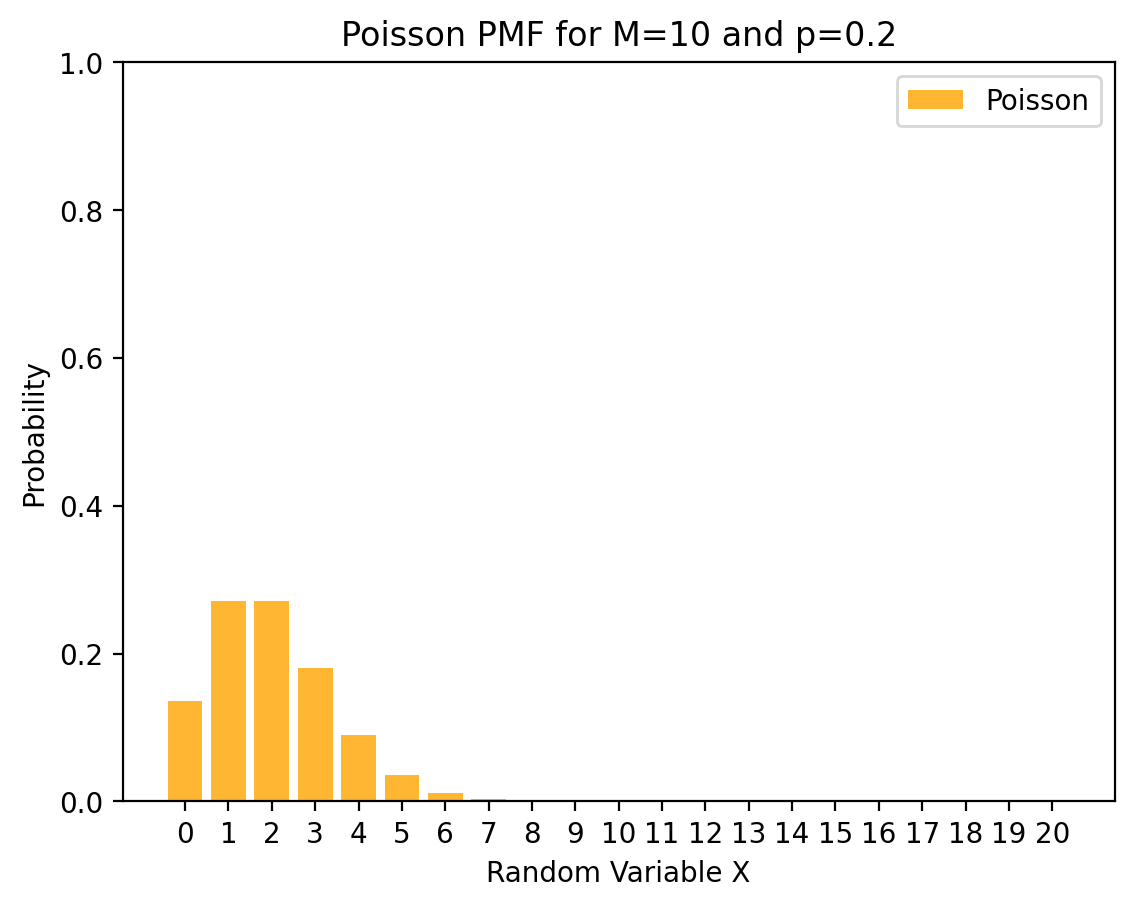

In [6]:
#Q1 d) Poisson PMF with M and p as parameters
def poisson_probability_M_p(M,p,k):
  lambd=M*p
  return np.exp(-lambd)*(lambd**k)/factorial(k)

def poisson_pmf_M_p(M, p, plot_pmf=True):
  k_val = np.arange(20 + 1)
  pmf = [poisson_probability_M_p(M, p, i) for i in k_val]
  if plot_pmf:
    plt.bar(k_val, pmf, color="orange", alpha=0.8, label="Poisson")
    plt.title(f"Poisson PMF for M={M} and p={p}")
    plt.xlabel("Random Variable X")
    plt.xticks(k_val)
    plt.ylim(0, 1)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()
  return pmf

# Example Plots
x1 = poisson_pmf_M_p(10, 0.5)
x2 = poisson_pmf_M_p(10, 0.2)

#### (ii) By taking $\lambda$ and $k$ as parameters and assuming $M$ tends to infinity

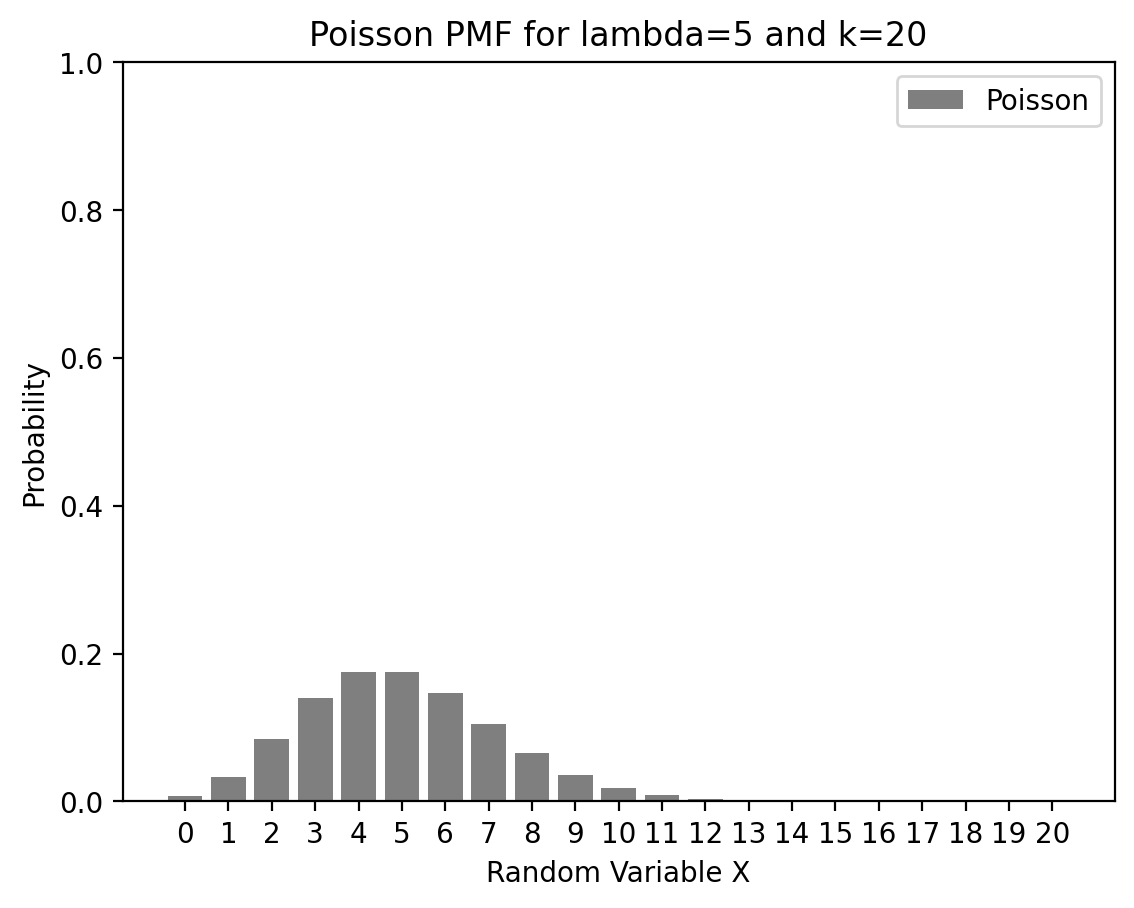

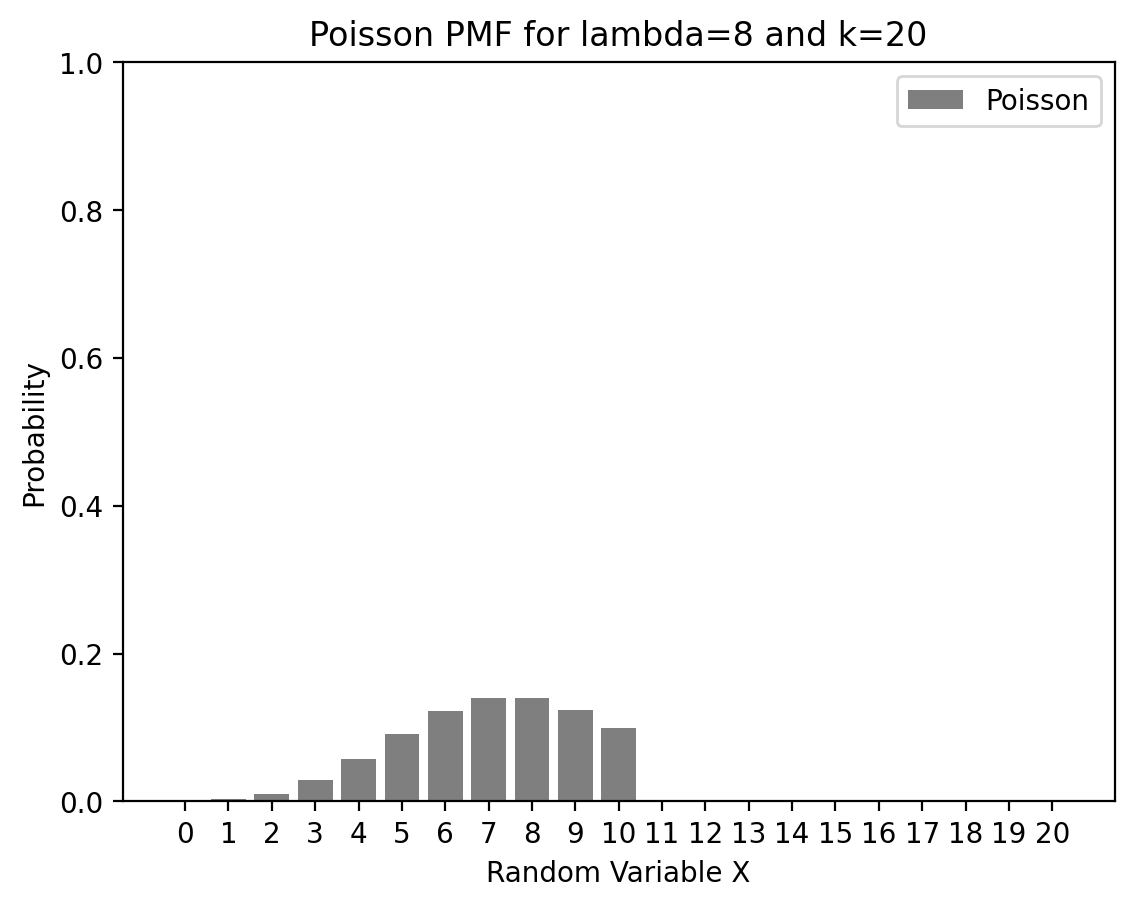

In [7]:
#Q1 d) Poisson PMF with lambda and k as parameters and assuming M tends to infinity
def poisson_probability_lambda_k(lamb, k):
  return np.exp(-lamb) * (lamb**k) / factorial(k)

def poisson_pmf_lambda_k(lamb, k, plot_pmf=True):
  x = np.arange(k + 1)
  pmf = [poisson_probability_lambda_k(lamb, i) for i in x]
  if plot_pmf:
    plt.bar(x, pmf, color="black", alpha=0.5, label="Poisson")
    plt.title(f"Poisson PMF for lambda={lamb} and k={k}")
    plt.xlabel("Random Variable X")
    plt.xticks(x)
    plt.ylim(0, 1)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()
  return pmf

# Example Plots
x1 = poisson_pmf_lambda_k(5, 20)
x2 = poisson_pmf_lambda_k(8, 20)

### Geometric Random Variable

Geometric random variable is used to model the number of trials needed to get the first success in a series of independent Bernoulli trials. The probability mass function of a Geometric random variable is:

$$P_x(k) = (1-p)^{k-1} p$$

where:
- $p$ is the probability of success on each trial,
- $k$ is the number of trials needed to get the first success.

This distribution is often used to model scenarios such as the number of attempts needed to pass a test or the number of sales calls needed to make a sale.

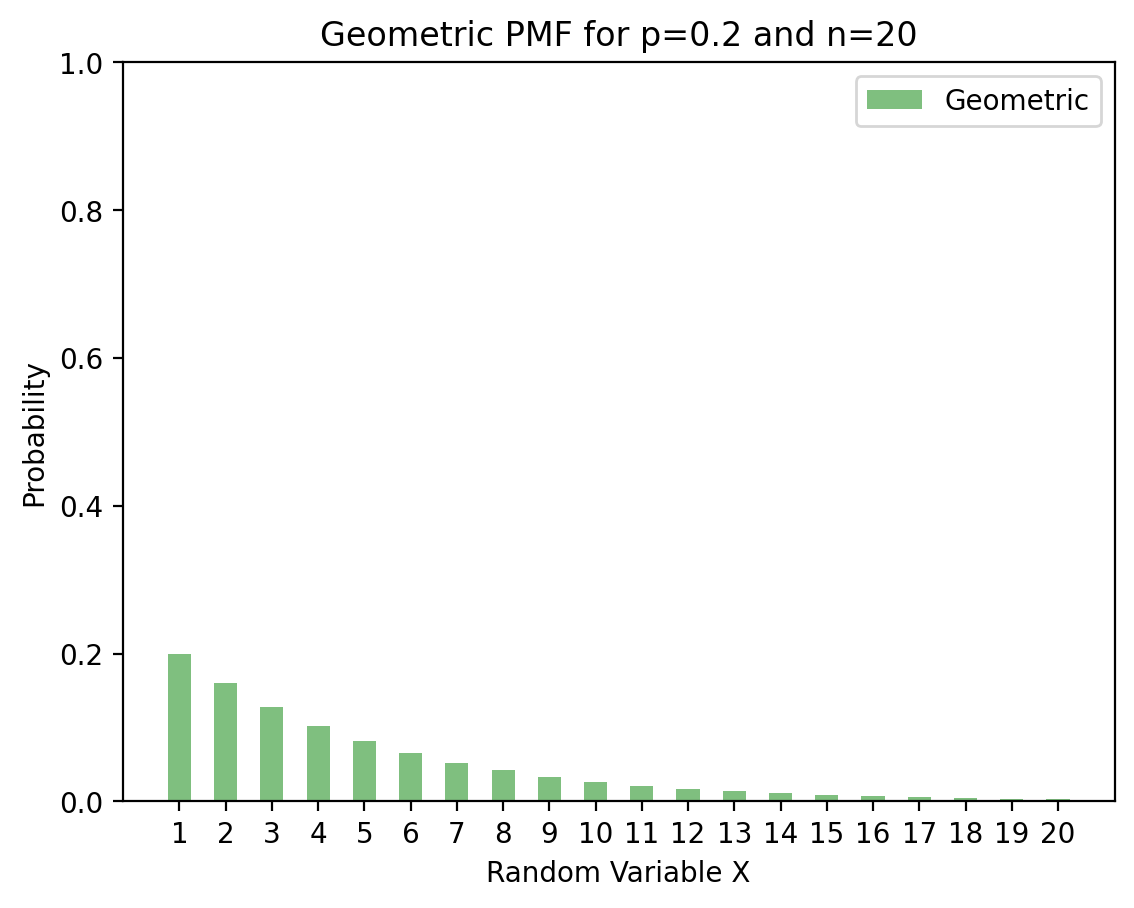

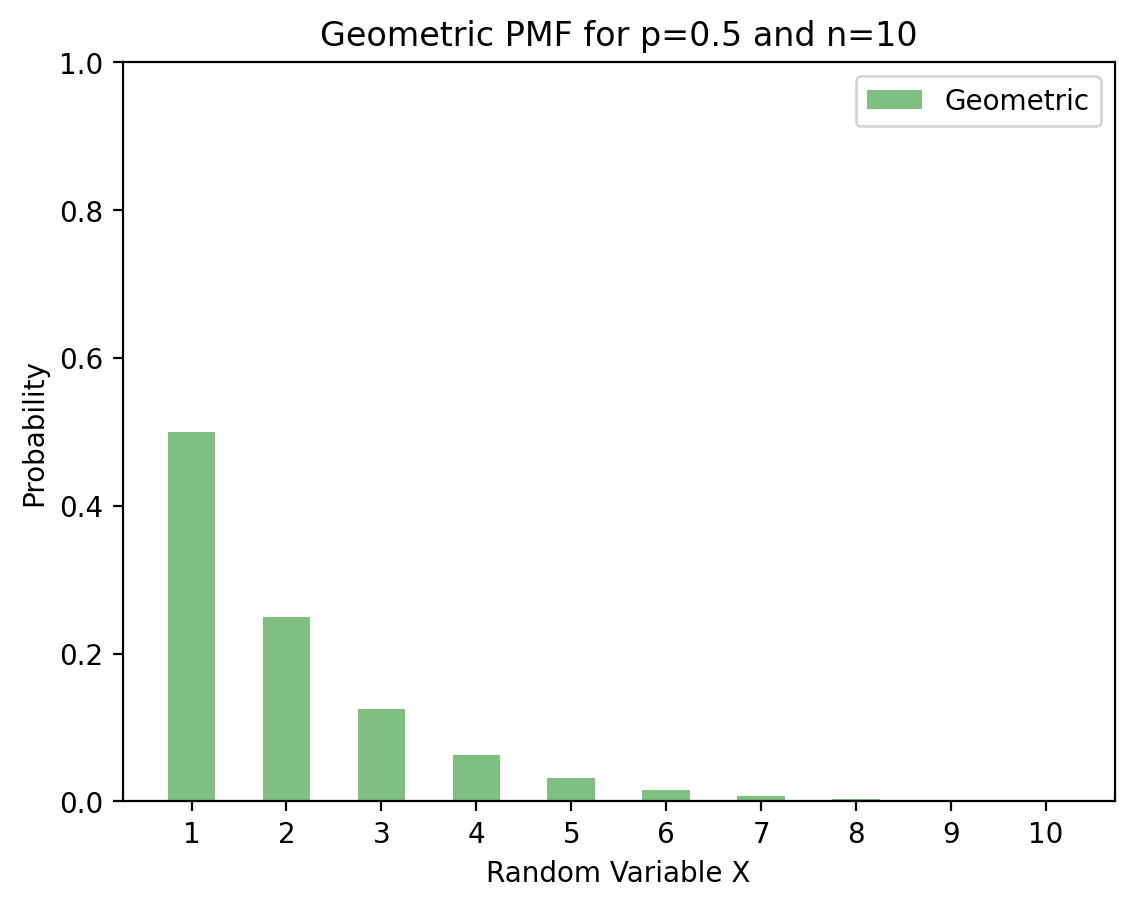

In [8]:
# Q1 e) Geomtric PMF
def geomtric_probability(p,k):
  return ((1-p)**(k-1))*p

def geometric_pmf(p, n, plot_pmf=True):
  trials = range(1, n + 1)
  pmf = [geomtric_probability(p, i) for i in trials]
  if plot_pmf:
    plt.bar(trials, pmf, width=0.5, color="green", alpha=0.5, label="Geometric")
    plt.title(f"Geometric PMF for p={p} and n={n}")
    plt.xlabel("Random Variable X")
    plt.xticks(trials)
    plt.ylim(0, 1)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()
  return pmf

# Example Plots
x1 = geometric_pmf(0.2,20)
x2 = geometric_pmf(0.5,10)

## Verifying the equivalence of the Binomial Distribution and the Poisson Distribution for large values of $M$ and small values of $p$

In this section, we will verify the equivalence of the Binomial Distribution and the Poisson Distribution for large values of $M$ and small values of $p$. Specifically, we will use $M=100$ and $p=0.1$.

We will compare the Probability Mass Functions (PMFs) of both distributions to demonstrate their equivalence under these conditions.

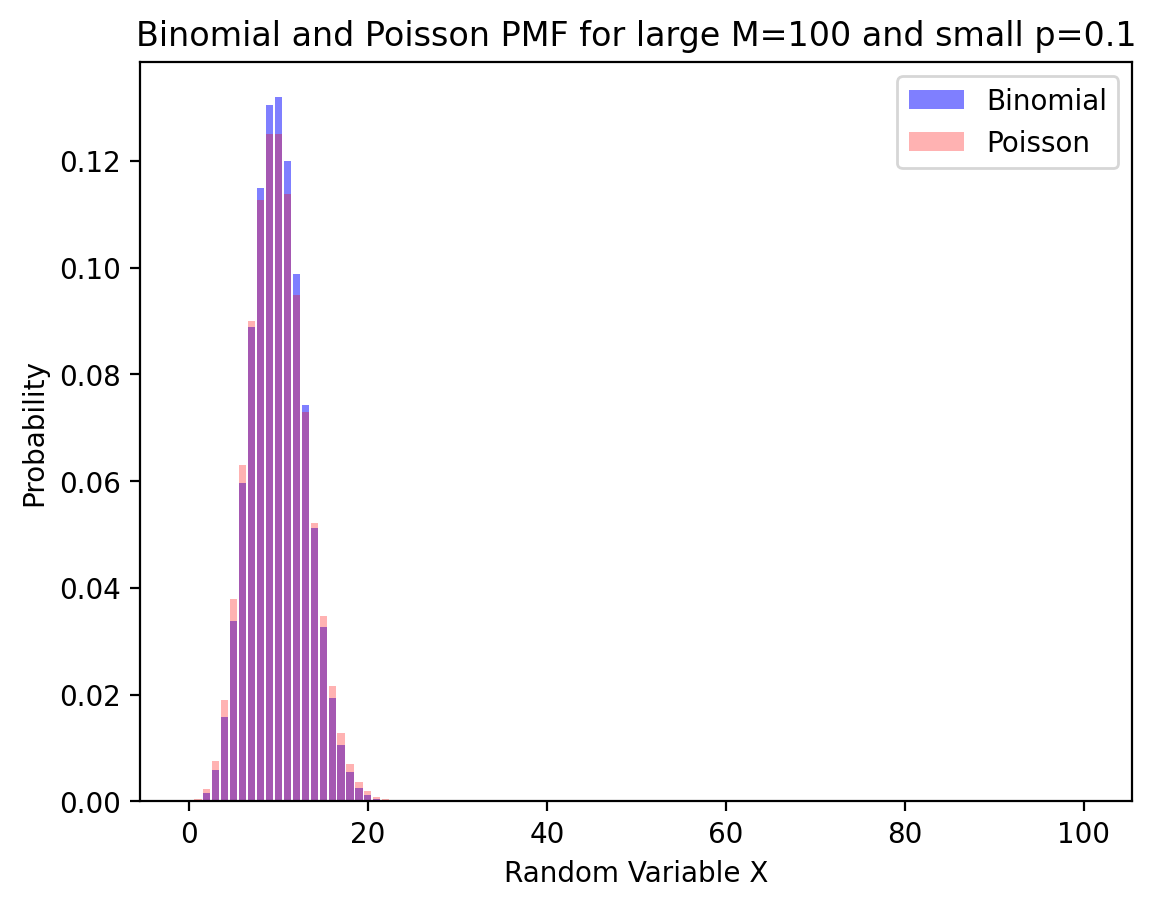

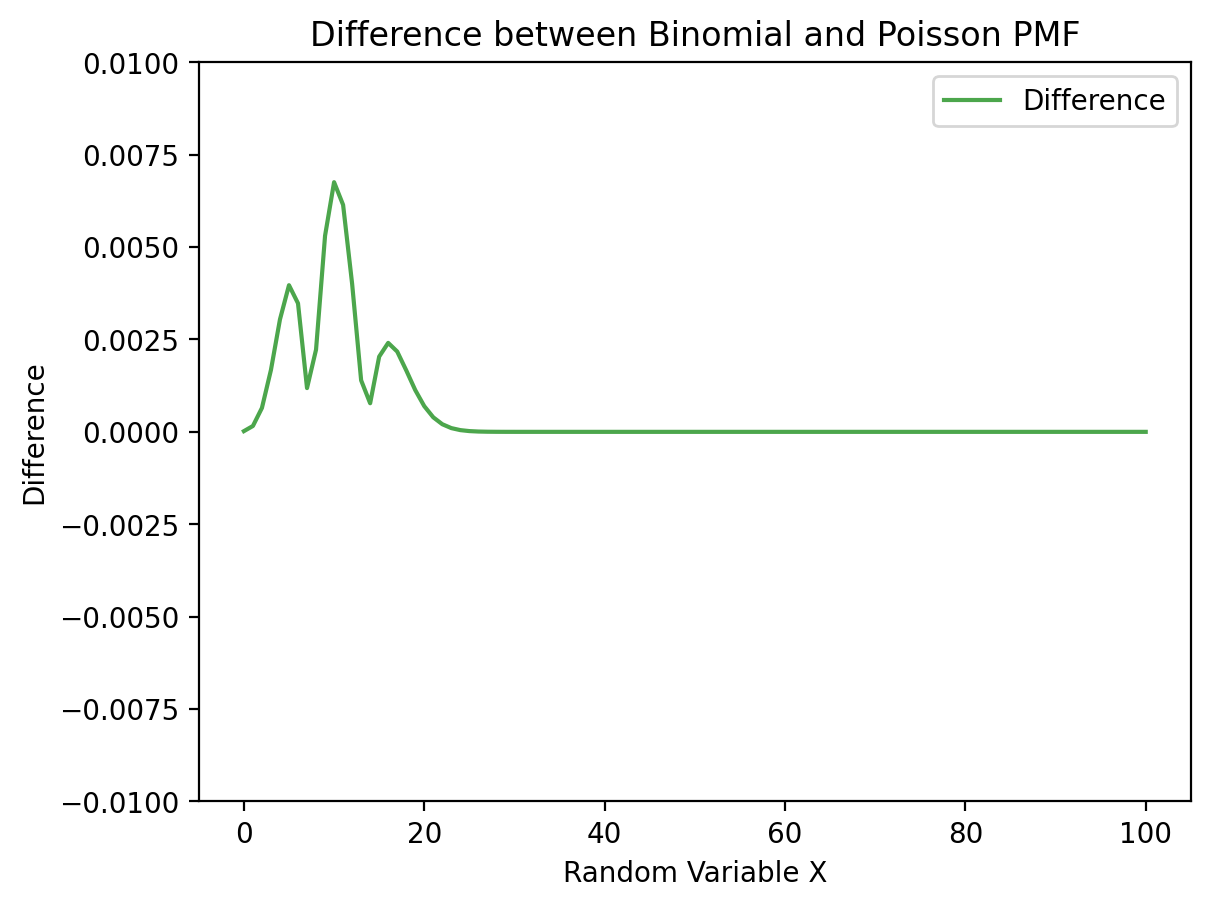

In [9]:
# Q2 Equivalence of Binomial and Poisson for large values of M and small values of p.

#Binomial PMF
M = 100
p = 0.1
binom_pmf = binomial_pmf(M, p, plot_pmf=False)

# Poisson PMF
poisson_lambda = M * p
poisson_pmf = poisson_pmf_lambda_k(poisson_lambda, M, plot_pmf=False)

# Plotting both PMFs one over the other
plt.bar(range(len(binom_pmf)), binom_pmf, label="Binomial", color="blue", alpha=0.5)
plt.bar(range(len(poisson_pmf)), poisson_pmf, label="Poisson", color="red", alpha=0.3)
plt.title("Binomial and Poisson PMF for large M=100 and small p=0.1")
plt.xlabel("Random Variable X")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Plotting the difference between the two PMFs
diff = np.abs(np.array(binom_pmf) - np.array(poisson_pmf))
plt.plot(range(len(diff)), diff, color="green", label="Difference", alpha=0.7)
plt.title("Difference between Binomial and Poisson PMF")
plt.xlabel("Random Variable X")
plt.ylim(-0.01, 0.01)
plt.ylabel("Difference")
plt.legend()
plt.show()

In [10]:
# mean abs difference between the two PMFs
mean_diff = np.mean(diff)
print(f"Mean Absolute Difference between Binomial and Poisson PMF: {mean_diff}")

Mean Absolute Difference between Binomial and Poisson PMF: 0.0005114568233474878


### Conclusion

From the above graph, we can infer that Binomial PMF and Poisson PMF are equivalent for large values of $M$ and small values of $p$.

The difference between the two PMFs is minimal, as shown in the difference plot. The mean absolute difference between the Binomial PMF and Poisson PMF is approximately 0.000511, indicating that the two distributions are nearly identical under these conditions. 

This validates the theoretical equivalence of the Binomial and Poisson distributions when the number of trials $M$ is large, and the probability of success $p$ is small.